# Brownian Motion

---

## Motivation

We can introduce Brownian Motion as a limit of a continuous symmetric random walk.

Divide the non-negative part of the real line $[0, \infty]$ into tiny intervals of length $\delta$, i.e. the $k$-th interval is $((k - 1) \delta, k\delta]$.

Now define a sequence of random variables $\{X_i\}_{i=1}^\infty$ as the result of a fair coin toss.
Each $X_i$ takes the value $\sqrt{\delta}$ if the coin lands on heads, and $-\sqrt{\delta}$ otherwise:
$$
X_i =
\begin{cases}
\sqrt{\delta}, & \text{with probability } \tfrac{1}{2}, \\[6pt]
-\sqrt{\delta}, & \text{with probability } \tfrac{1}{2}.
\end{cases}
$$
This represents the amount by which we move along the $y$-axis on the $i$-th interval. We can compute some statistics of these RVs, i.e.:
$$
\begin{aligned}
\mathbb{E}[X_i] &= \frac{1}{2} \sqrt{\delta} + \left(- \frac{1}{2} \sqrt{\delta}\right) = 0 \\
\mathbb{E}[X_i^2] &= \frac{1}{2} \delta + \frac{1}{2} \delta = \delta \\
\text{Var}[X_i] &= \mathbb{E}[X_i^2] - \mathbb{E}[X_i]^2 = \delta
\end{aligned}
$$

Now define the process $W_t$ as follows. We set $W_0 = 0$. At time $t_n = n\delta$, we have:
$$
W_{t_n} = W_{n\delta} = \sum_{i=1}^n X_i
$$

As an example:
$$
\begin{array}{c|c|c}
i & X_i & W_i = \sum_{j=1}^{i} X_j \\ \hline
1 & \uparrow & \sqrt{\delta} \\
2 & \downarrow & 0 \\
3 & \uparrow & \sqrt{\delta} \\
4 & \uparrow & 2\sqrt{\delta} \\
5 & \downarrow & \sqrt{\delta} \\
6 & \uparrow & 2\sqrt{\delta} 
\end{array}
$$

Recall these are i.i.d. random variables, so the cross moment $E[X_j X_l] = 0$ for $i \neq j$ and therefore we have:
$$
\begin{aligned}
\mathbb{E}[W_{t_n}] &= \mathbb{E}\left[\sum_{i=1}^n X_i\right] = \sum_{i=1}^n \mathbb{E}[X_i] = 0 \\
\mathbb{E}[W_{t_n}^2] &= \mathbb{E}\left[\left(\sum_{i=1}^n X_i \right)^2\right] = \mathbb{E}\left[\sum_{i=1}^n X_i^2\right] = \sum_{i=1}^n \mathbb{E}[X_i^2] = n\delta = t_n \\
\text{Var}[W_{t_n}] &= \mathbb{E}[W_{t_n}^2] - \mathbb{E}[W_{t_n}]^2 = t_n
\end{aligned}
$$


Recall the Central Limit Theorem (CLT), which gives:
$$
W_{t_n} \xrightarrow{d} \mathcal{N}(0, t_n) \quad \text{as } n \to \infty
$$

Moreover, since the coin tosses are independent, the increments must be independent, i.e.
$W_{t_n} - W_{t_{n-1}}, \ldots, W_{t_1} - W_{t_0}$ for all $t_0 < t_1 < \ldots < t_n$ are also independent. Thus we have
$$
\begin{aligned}
\mathbb{E}[W_{t_k} - W_{t_l}] &= \sum_{i=k}^{l} \mathbb{E}[X_i] = 0 \\
\text{Var}[W_{t_k} - W_{t_l}] &= \sum_{i=k}^{l} \text{Var}[X_i] = (k - l) \delta = t_k - t_l
\end{aligned}
$$

Again, by the CLT we have that 
$$
W_{t_k} - W_{t_l} \xrightarrow{d} \mathcal{N}(0, t_k - t_l) \quad \text{as } n \to \infty
$$
and we can conclude that $W_t$ has *stationary increments*.

---

## Definition

A random process $W_t$ is called a Brownian Motion (or Wiener process) if 
1. $W_0 = 0$
2. $\forall 0 \leq t_1 < t_2$, $W_{t_2} - W_{t_1} \xrightarrow{d} \mathcal{N}(0, t_2 - t_1)$
3. $W_t$ has independent increments.
4. $W_t$ is almost surely continuous in $t$, or more formally $\lim_{s \to t} W_s(\omega) = W_t(\omega) \quad \text{a.s.}$

---

## Examples

**Example**: Compute $\mathbb{P}(1 < W_1 < 2)$, where $W_t$ is a standard Wiener process.

**Solution**:
We know that
$$
W_1 - W_0 = W_1 \sim \mathcal{N}(0, 1),
$$
so
$$
\mathbb{P}(1 < W_1 < 2) = \Phi(2) - \Phi(1),
$$
where $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.

---

**Example**: Let $W_t$ be a standard Wiener process, and define
$$
X_t = \exp(W_t).
$$
Find the distribution of $X_t$, and give it's mean and variance.

**Solution**: We have $\ln X_t = W_t$, i.e.
$$
X_t \sim \text{LogNormal}(0, t)
$$

The mean of $X_t$ is:

$$
\mathbb{E}[X_t] = \mathbb{E}[e^{W_t}] = \int_{-\infty}^{\infty} e^y \frac{1}{\sqrt{2 \pi t}} e^{-\frac{y^2}{2t}} = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi t}} \exp\left(-\frac{y^2}{2t} + y\right)\, dy
$$

Combine the exponentials and complete the square:

$$
-\frac{y^2}{2t} + y = -\frac{(y - t)^2}{2t} + \frac{t}{2}
$$

The integral of the normal density is 1, so the mean is:

$$
\mathbb{E}[X_t] = e^{t/2}
$$

Next, compute the variance. First, find the second moment:

$$
\mathbb{E}[X_t^2] = \mathbb{E}[e^{2 W_t}] = e^{2^2 \cdot t / 2} = e^{2 t}
$$

Subtract the square of the mean to get the variance:

$$
\mathrm{Var}[X_t] = \mathbb{E}[X_t^2] - (\mathbb{E}[X_t])^2 = e^{2 t} - (e^{t/2})^2 = e^{2 t} - e^t
$$

---

## Simulation

In [1]:

import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(42)

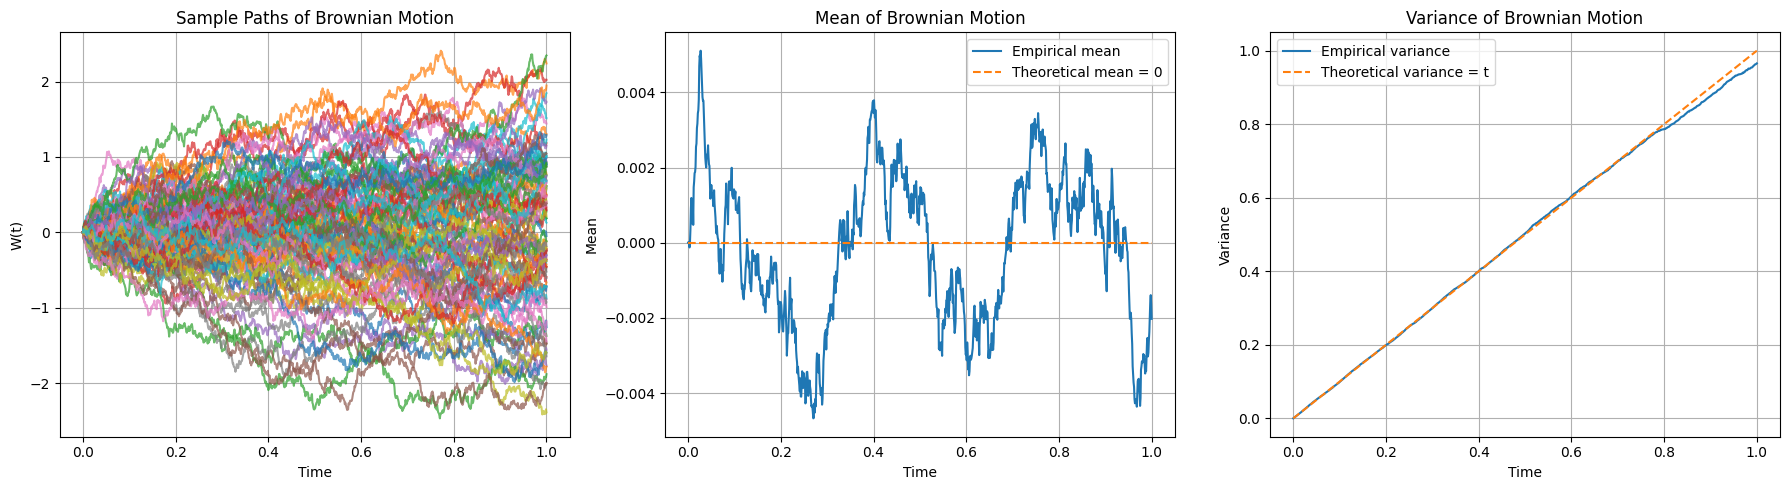

In [3]:
import numpy as np

# --- Parameters ---
T = 1.0          # final time
N = 1000         # time steps
dt = T / N
t = np.linspace(0, T, N + 1)

num_paths = 10000

# Generate Brownian motion paths
increments = np.sqrt(dt) * np.random.randn(num_paths, N)
W = np.cumsum(increments, axis=1)
W = np.column_stack([np.zeros(num_paths), W])  # W_0 = 0

# Empirical mean and variance
emp_mean = W.mean(axis=0)
emp_var = W.var(axis=0)

fig, ax = plt.subplots(1, 3, figsize=(18, 5)) 

# ---- Plot paths ----
for i in range(min(100, num_paths)):
    ax[0].plot(t, W[i], alpha=0.7)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("W(t)")
ax[0].set_title("Sample Paths of Brownian Motion")
ax[0].grid(True)

# ---- Plot mean ----
ax[1].plot(t, emp_mean, label="Empirical mean")
ax[1].plot(t, np.zeros_like(t), "--", label="Theoretical mean = 0")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Mean")
ax[1].set_title("Mean of Brownian Motion")
ax[1].legend()
ax[1].grid(True)

# ---- Plot variance ----
ax[2].plot(t, emp_var, label="Empirical variance")
ax[2].plot(t, t, "--", label="Theoretical variance = t")
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Variance")
ax[2].set_title("Variance of Brownian Motion")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()
